In [545]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# official final rankings in D3 National Championships
final_rankings = [
    "MIT", "U. of Chicago", "Williams", "NYU", "Johns Hopkins", "Colorado College", "Emory", "Washington and Lee", "SUNY Geneseo", "Washington U.", "Claremont-Mudd-Scripps", "RPI", "Wis.-La Crosse", "Amherst", "Calvin", "Tufts", "St. Olaf", "Carleton", "UC Santa Cruz", "Vassar", "George Fox", "Middlebury", "Connecticut College", "Wesleyan", "Carnegie Mellon", "Wartburg", "Lynchburg", "Trine", "DePauw", "Pomona-Pitzer", "Coast Guard", "Rowan"
]
# given two lists of rankings, find the mean squared error of their positions 
def compare_lists(list1, list2):
    val =  abs(stats.spearmanr(list1, list2)[0])
    if np.isnan(val):
        return 0
    return val 
    # return len(set(list1).intersection(set(list2)))/len(schools)



    # for school in schools:
    #     if school in list1 and school in list2:
    #         se.append((list1.index(school) - list2.index(school)) ** 2)
    # return np.sqrt(sum(se)) / len(schools)


In [547]:
adj = pd.read_csv("./running_all_d3.csv", header=0)
labels = adj.columns.tolist()
A = adj.values

In [548]:
point_diff = pd.read_csv("./running_all_d3_diff.csv", header=0)
point_diff = point_diff.to_numpy()


time_diff = pd.read_csv("./running_all_d3_time_diff.csv", header=0)
time_diff = time_diff.to_numpy()

time_diff

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [240.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ..., 239.,   0.,   0.],
       [  0.,   0.,   0., ..., 324.,  85.,   0.]])

In [549]:
# school 0 lost to school 1
A[0][1]
# 
# point_diff[0][1]
point_diff[1][0]

307.5

In [550]:
G = nx.DiGraph()
for i, u in enumerate(labels):
    for j, v in enumerate(labels):
        w = A[i, j]
        if w != 0:
            G.add_edge(u, v, weight=w)

In [551]:
def springRank(G, nodelist, alpha=0.1, change_adj = False,change_minus_one=False, L=None):

    if change_adj:
        adj = pd.read_csv("./running_all_d3_diff.csv", header=0)
        A = adj.values
        # change all to positive
        A = np.abs(A)
    else: #just use what we already have 
        A = nx.to_numpy_array(G, nodelist=nodelist, weight='weight')

    k_in = np.sum(A, axis=0)
    # k_in = np.zeros(len(A))

    # for i in range(A.shape[0]):
    #     total = 0
    #     for j in range(len(A[i])): 
    #         total += A[j][i] 
    #     k_in[i] = total
        



    k_out = np.sum(A, axis=1)


    # new_sub = np.zeros(len(A))

    # for i in range(len(A)):
    #     for j in range(len(A[i])):
    #         # A[i][j] is the number of times j beat i
    #         # L[i][j] is the NEGATIVE average point difference of j beating i
    #         if change_minus_one:
    #             # new_sub[i] += L[j][i]*(A[j][i] - A[i][j])
    #             new_sub[i] = abs(L[j][i]) * A[j][i] - abs(L[i][j]) * A[i][j]
    #         else:
    #             new_sub[i] += (A[j][i] - A[i][j])

    #         # new_sub[i] += (A[j][i] - A[i][j])
    

    if change_minus_one:
        W = np.diag(np.matmul(A.transpose(), L))
        Z = np.diag(np.matmul(A, L.transpose()))
        new_sub = W - Z
    else: 
        new_sub = k_in - k_out

    Kin = np.diag(k_in)
    Kout = np.diag(k_out)

    M = Kout + Kin - (A + A.T) + alpha * np.identity(len(nodelist))
    b = (new_sub)

    s = np.linalg.solve(M, b)

    return dict(zip(nodelist, s))

springRank(G, labels, alpha=0.1, change_adj=False, change_minus_one=False, L=point_diff)

{'MIT': 1.2610334371937704,
 'Colby-Sawyer': -0.3631350046800128,
 'U. of Chicago': 1.5116543663351234,
 'Washington U.': 1.2347105101525786,
 'DePauw': 1.054958025561895,
 'Grinnell': 1.0808629673659778,
 'Central College': 0.9406345514217576,
 'Elmhurst': 0.4923763767327774,
 'Wis.-Whitewater': 0.872851889845609,
 'Wis.-Oshkosh': 0.8348944570910489,
 'Trine': 0.7107548885831138,
 'Centre': 0.3095885098284604,
 'Kalamazoo': 0.43445308199437804,
 'Anderson (Ind.)': -0.5611374148682257,
 'Webster': -0.2558836340212039,
 'NYU': 1.316154922424658,
 'Williams': 1.2488067762348445,
 'Washington and Lee': 1.0148873724040726,
 'Amherst': 1.4124294273942208,
 'St. Olaf': 1.1830101526256984,
 'Tufts': 1.042090009420033,
 'Middlebury': 1.1449322653191394,
 'Connecticut College': 0.8073252121861585,
 'Vassar': 1.0945272723132176,
 'Coast Guard': 0.8324057109946394,
 'Smith': 0.7476845403884143,
 'Bates': 0.7460185570666034,
 'Bowdoin': 0.6729369492712317,
 'Colby': 0.6485764133394422,
 'Misericor

In [552]:
alpha = 0.1
raw_scores = springRank(G, labels, alpha, L = point_diff)
scores = np.array([ raw_scores[node] for node in labels ])
scores_norm = (scores - scores.min()) / (scores.max() - scores.min() + 1e-9)


In [553]:
# plt.figure(figsize=(10, 8))
# pos = nx.kamada_kawai_layout(G, scale=2)
# nodes = nx.draw_networkx_nodes(
#     G, 
#     pos,
#     nodelist=labels,
#     node_color=scores_norm,
#     cmap=plt.cm.viridis,
#     node_size=100 + 300 * scores_norm,
#     alpha=0.9
# )
# nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=12, width=1)
# nx.draw_networkx_labels(G, pos, font_size=8)
# plt.colorbar(nodes, label="Normalized SpringRank")
# plt.title("SpringRank Visualization", fontsize=12)
# plt.axis('off')
# plt.tight_layout()
# plt.show()

In [554]:
pr = dict(zip(labels, scores_norm))

sorted_list = sorted(pr.items(), key=lambda x: x[1], reverse=True)
#   # get the ordered list

print("Ranked Schools:")

for i, (school, score) in enumerate(sorted_list, start=1):
    print(f"{i}. {school} - {score:.4f}")


Ranked Schools:
1. U. of Chicago - 1.0000
2. Amherst - 0.9633
3. NYU - 0.9276
4. Claremont-Mudd-Scripps - 0.9132
5. MIT - 0.9072
6. Williams - 0.9027
7. Washington U. - 0.8975
8. Carleton - 0.8915
9. RPI - 0.8874
10. Emory - 0.8867
11. St. Olaf - 0.8784
12. Wis.-La Crosse - 0.8740
13. Colorado College - 0.8643
14. Middlebury - 0.8643
15. Wis.-Eau Claire - 0.8520
16. Vassar - 0.8456
17. Grinnell - 0.8406
18. UC Santa Cruz - 0.8373
19. DePauw - 0.8310
20. Carnegie Mellon - 0.8305
21. SUNY Geneseo - 0.8283
22. George Fox - 0.8280
23. Tufts - 0.8262
24. Washington and Lee - 0.8161
25. Calvin - 0.7954
26. Central College - 0.7886
27. Pomona-Pitzer - 0.7872
28. Lynchburg - 0.7871
29. Wis.-Stout - 0.7848
30. Wartburg - 0.7807
31. Concordia (Wis.) - 0.7799
32. John Carroll - 0.7761
33. Johns Hopkins - 0.7676
34. Gettysburg - 0.7658
35. Wis.-Whitewater - 0.7636
36. St. Scholastica - 0.7565
37. Lawrence - 0.7561
38. Wis.-Oshkosh - 0.7495
39. Coast Guard - 0.7486
40. Connecticut College - 0.7393


In [555]:
ordered = []

for i in range(len(final_rankings)):
    ordered.append(sorted_list[i][0])
compare_lists(final_rankings, ordered)
    

0.38159824046920815

In [556]:
def top_k_mse(k, rankings, final_rankings):
    """
    Calculate the mean squared error for the top k rankings.
    """
    mse = compare_lists(rankings[:k], final_rankings[:k])
    return mse

In [557]:
def ordered(scores):
    pr = dict(zip(labels, scores))
    sorted_list = sorted(pr.items(), key=lambda x: x[1], reverse=True)
    ordered = []
    for i in range(len(final_rankings)):
        ordered.append(sorted_list[i][0])
    return ordered
def do_springrank_change_diff(G, L):
    raw_scores = springRank(G, labels, alpha, change_minus_one=True, L=L) 
    scores = np.array([ raw_scores[node] for node in labels ])
    return ordered(scores)
def do_springrank_adj_change(G):
    raw_scores = springRank(G, labels, alpha, change_adj=True) 
    scores = np.array([ raw_scores[node] for node in labels ])
    return ordered(scores)
def do_springrank_both_changes(G):
    raw_scores = springRank(G, labels, alpha, change_adj=True, change_minus_one=True)
    scores = np.array([ raw_scores[node] for node in labels ])
    return ordered(scores)
def do_springrank(G):
    raw_scores = springRank(G, labels, alpha)
    scores = np.array([ raw_scores[node] for node in labels ])
    return ordered(scores)
def do_pagerank(G):
    raw_scores = nx.pagerank(G, alpha=alpha)
    scores = np.array([ raw_scores[node] for node in labels ])
    return ordered(scores)
def do_eigenrank(G):
    raw_scores = nx.eigenvector_centrality(G, max_iter=1000)
    scores = np.array([ raw_scores[node] for node in labels ])
    return ordered(scores)
    

['U. of Chicago', 'Amherst', 'NYU', 'Claremont-Mudd-Scripps', 'MIT', 'Williams', 'Washington U.', 'Carleton', 'RPI', 'Emory', 'St. Olaf', 'Wis.-La Crosse', 'Colorado College', 'Middlebury', 'Wis.-Eau Claire', 'Vassar', 'Grinnell', 'UC Santa Cruz', 'DePauw', 'Carnegie Mellon', 'SUNY Geneseo', 'George Fox', 'Tufts', 'Washington and Lee', 'Calvin', 'Central College', 'Pomona-Pitzer', 'Lynchburg', 'Wis.-Stout', 'Wartburg', 'Concordia (Wis.)', 'John Carroll']


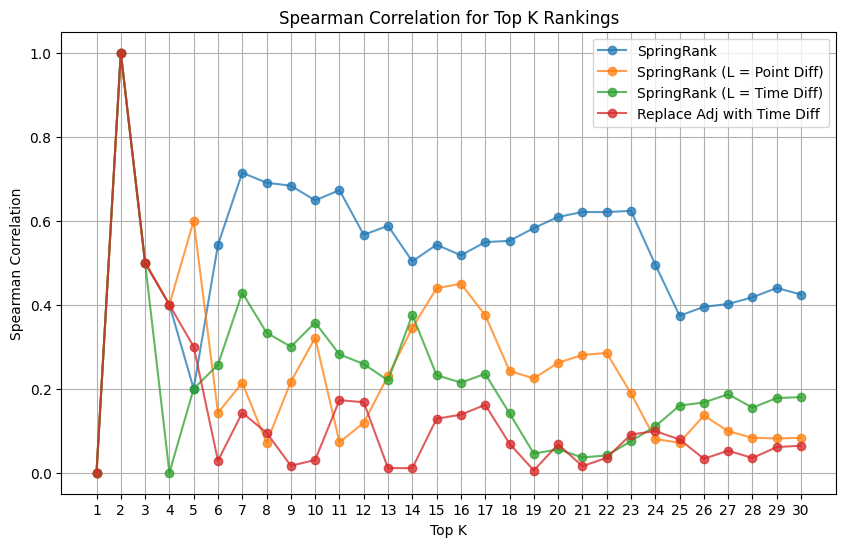

[0, 0.9999999999999999, 0.5, 0.39999999999999997, 0.19999999999999998, 0.5428571428571429, 0.7142857142857144, 0.6904761904761906, 0.6833333333333333, 0.6484848484848483, 0.6727272727272727, 0.5664335664335665, 0.5879120879120878, 0.5032967032967033, 0.5428571428571428, 0.5176470588235293, 0.5490196078431373, 0.5521155830753354, 0.5824561403508772, 0.6090225563909774, 0.6207792207792208, 0.6205533596837945, 0.6235177865612649, 0.4956521739130434, 0.3738461538461539, 0.39487179487179486, 0.40170940170940167, 0.4176245210727969, 0.4399014778325122, 0.4242491657397108]


In [558]:
springrank_mses = []
springrank_mses_minus_one = []
springrank_mses_minus_one_time = []
springrank_mses_change_adj = []
springrank_mses_both_changes = []
pagerank_mses = []
eigenrank_mses = []

spring_rankings = do_springrank(G)
spring_rankings_minus_one = do_springrank_change_diff(G, point_diff)
spring_rankings_minus_one_time = do_springrank_change_diff(G, time_diff)
spring_rankings_change_adj = do_springrank_adj_change(G)
# spring_rankings_both_changes = do_springrank_both_changes(G)

# pagerank_rankings = do_pagerank(G)
# eigenrank_rankings = do_eigenrank(G)

print(spring_rankings)
for k in range(1, 31):
    springrank_mse = top_k_mse(k, spring_rankings, final_rankings)
    springrank_mses.append(springrank_mse)

    springrank_mse_minus_one = top_k_mse(k, spring_rankings_minus_one, final_rankings)
    springrank_mses_minus_one.append(springrank_mse_minus_one)

    springrank_mse_minus_one_time = top_k_mse(k, spring_rankings_minus_one_time, final_rankings)
    springrank_mses_minus_one_time.append(springrank_mse_minus_one_time)

    springrank_mse_change_adj = top_k_mse(k, spring_rankings_change_adj, final_rankings)
    springrank_mses_change_adj.append(springrank_mse_change_adj)

    # springrank_mse_both_changes = top_k_mse(k, spring_rankings_both_changes, final_rankings)
    # springrank_mses_both_changes.append(springrank_mse_both_changes)

    # pagerank_mse = top_k_mse(k, pagerank_rankings, final_rankings)
    # pagerank_mses.append(pagerank_mse)

    # eigenrank_mse = top_k_mse(k, eigenrank_rankings, final_rankings)
    # eigenrank_mses.append(eigenrank_mse)

plt.figure(figsize=(10, 6))

# dropoff of dates
# alpha (1)
# dropoff_1 = [0, 0.9999999999999999, 1.0, 0.39999999999999997, 0.3, 0.08571428571428573, 0.14285714285714288, 0.2380952380952381, 0.31666666666666665, 0.33333333333333326, 0.4090909090909091, 0.41958041958041964, 0.16483516483516483, 0.2571428571428571, 0.3071428571428571, 0.32647058823529407, 0.2916666666666667, 0.31888544891640863, 0.3473684210526316, 0.21654135338345865, 0.24415584415584415, 0.24562394127611523, 0.15612648221343872, 0.08521739130434783, 0.0723076923076923, 0.11452991452991453, 0.12332112332112331, 0.15216201423097975, 0.17881773399014775, 0.17285873192436038]

# # alpha (0.75)
# dropoff_75 = [0, 0.9999999999999999, 0.5, 0.19999999999999998, 0.19999999999999998, 0.2, 0.03571428571428572, 0.023809523809523815, 0.03333333333333333, 0.09090909090909088, 0.3181818181818182, 0.3076923076923077, 0.39560439560439564, 0.42857142857142855, 0.36428571428571427, 0.3, 0.2377450980392157, 0.2549019607843137, 0.21403508771929824, 0.22255639097744356, 0.26103896103896107, 0.2625635234330887, 0.29249011857707513, 0.16086956521739126, 0.12615384615384617, 0.12136752136752137, 0.10012210012210011, 0.0990695128626163, 0.12709359605911327, 0.13548387096774192]

# # alpha (0.5)
# dropoff_05 = [0, 0.9999999999999999, 0.5, 0.39999999999999997, 0.3, 0.2571428571428572, 0.0, 0.04761904761904763, 0.03333333333333333, 0.006060606060606061, 0.07272727272727274, 0.034965034965034975, 0.06043956043956044, 0.24835164835164836, 0.32499999999999996, 0.28823529411764703, 0.24019607843137256, 0.1929824561403509, 0.1719298245614035, 0.2270676691729323, 0.2636363636363636, 0.2885375494071147, 0.27865612648221344, 0.2904347826086956, 0.3376923076923077, 0.3285470085470085, 0.29426129426129427, 0.3021346469622332, 0.23940886699507383, 0.22625139043381537] 

# # alpha (0.1)
# dropoff_01 = [0, 0.9999999999999999, 0.5, 0.39999999999999997, 0.39999999999999997, 0.3714285714285715, 0.1785714285714286, 0.07142857142857144, 0.06666666666666667, 0.01818181818181818, 0.23636363636363636, 0.2027972027972028, 0.3131868131868132, 0.23076923076923075, 0.14285714285714282, 0.07647058823529412, 0.10784313725490197, 0.11867905056759545, 0.0456140350877193, 0.05864661654135337, 0.02857142857142857, 0.018633540372670808, 0.00691699604743083, 0.05391304347826086, 0.061538461538461535, 0.006495726495726496, 0.001221001221001221, 0.034482758620689655, 0.016256157635467977, 0.006006674082313682] 

# plt.plot(range(1, 31), dropoff_1, marker='o', label=r"$\alpha$ = 0.85", alpha=0.75)
# plt.plot(range(1, 31), dropoff_75, marker='o', label=r'$\alpha$ = 0.75', alpha=0.75)
# plt.plot(range(1, 31), dropoff_05, marker='o', label=r'$\alpha$ = 0.5', alpha=0.75)
# plt.plot(range(1, 31), dropoff_01, marker='o', label=r'$\alpha$ = 0.1', alpha=0.75)
# plt.plot(range(1, 31), springrank_mses_both_changes, marker='o', label='SpringRank (Both Changes)')
# plt.plot(range(1, 31), springrank_mses_minus_one, marker='o', label='SpringRank (Minus One)')
plt.plot(range(1, 31), springrank_mses, marker='o', label='SpringRank', alpha=0.75)
plt.plot(range(1, 31), springrank_mses_minus_one, marker='o', label='SpringRank (L = Point Diff)', alpha=0.75)
plt.plot(range(1, 31), springrank_mses_minus_one_time, marker='o', label='SpringRank (L = Time Diff)', alpha=0.75)
plt.plot(range(1, 31), springrank_mses_change_adj, marker='o', label='Replace Adj with Time Diff', alpha=0.75)
# plt.plot(range(1, 31), pagerank_mses, marker='o', label='PageRank')
# plt.plot(range(1, 31), eigenrank_mses, marker='o', label='EigenRank')
plt.legend()
plt.title('Spearman Correlation for Top K Rankings')
plt.xlabel('Top K')
plt.ylabel('Spearman Correlation')
plt.xticks(range(1, 31))
plt.grid()
plt.show()
print(springrank_mses)


In [559]:
time_diff

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [240.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ..., 239.,   0.,   0.],
       [  0.,   0.,   0., ..., 324.,  85.,   0.]])

In [560]:
point_diff

array([[  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [307.5,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       ...,
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ..., 251. ,   0. ,   0. ],
       [  0. ,   0. ,   0. , ..., 292. ,  41. ,   0. ]])